## Importing important modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (14, 7)

## Loading Data

In [3]:
path = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(path, sep=',')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Data has 2 columns one is feature and other is target column.

There is no null value in both.

## EDA

<AxesSubplot:ylabel='Density'>

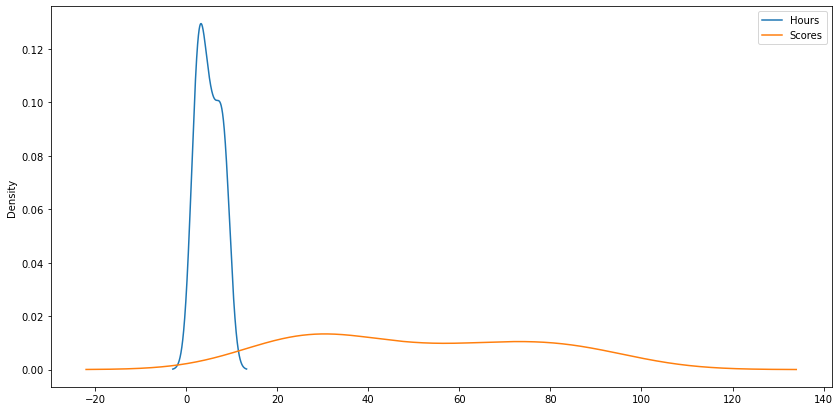

In [18]:
df.plot(kind="kde")

<AxesSubplot:xlabel='Hours', ylabel='Density'>

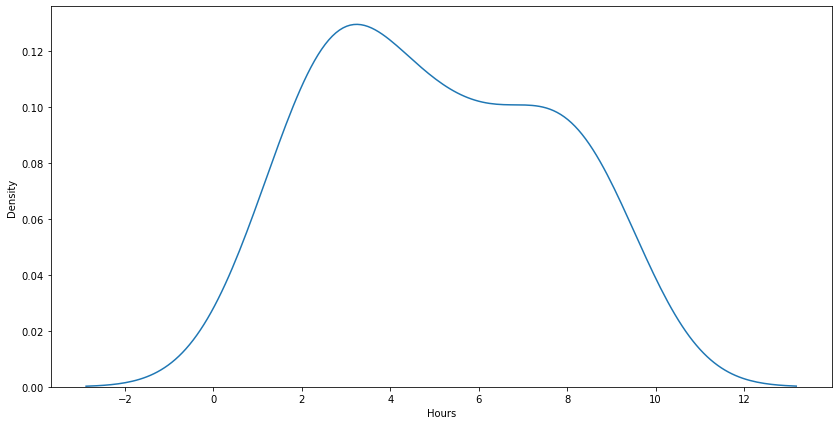

In [19]:
sns.kdeplot(df.Hours)

## Model Preparation

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error

In [42]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [60]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_model_score = linear_model.score(x_train, y_train)
print("Model's Score is ", round(linear_model_score*100, 2), "%")

Model's Score is  95.81 %


In [51]:
linear_pred = linear_model.predict(x_test)

In [55]:
compar = pd.DataFrame({
    "Actual" : y_test,
    "Predicted" : linear_pred})
compar

,Actual,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


In [69]:
linear_error = mean_absolute_error(y_test, linear_pred)
print("MRE is ", round(linear_error, 2))

MRE is  5.63


In [67]:
svr_model = LinearSVR()
svr_model.fit(x_train, y_train)
svr_model_score = svr_model.score(x_train, y_train)
print("Model's Score is ", round(svr_model_score*100, 2), "%")

Model's Score is  95.5 %


In [68]:
svr_pred = svr_model.predict(x_test)

In [70]:
svr_error = mean_absolute_error(y_test, svr_pred)
print("MRE is ", round(svr_error, 2))

MRE is  6.0


In [75]:
data = {"Model" : ["LinearRegression()", "LinearSVR()"],
        "Score" : [round(linear_model_score, 2), round(svr_model_score, 2)],
        "MRE" : [round(linear_error, 2), round(svr_error, 2)]}
model_comp = pd.DataFrame(data)
model_comp

,Model,Score,MRE
0,LinearRegression(),0.96,5.63
1,LinearSVR(),0.95,6.00


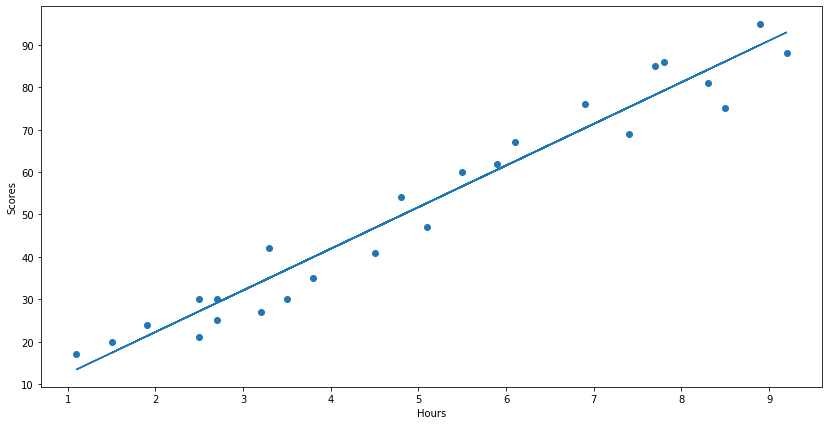

In [83]:
plt.scatter(x=df.Hours, y=df.Scores)
plt.plot(x, linear_model.coef_*x+linear_model.intercept_)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()